In [1]:
using DrWatson
@quickactivate "TriangularHubbard"
using TriangularHubbard

using PyCall
using PyPlot

using LinearAlgebra
using JSON
using DBInterface
using SQLite
using DataFrames
using DataFramesMeta
using LsqFit
using Printf
using Quadmath
using ProgressMeter
using Dates
using CSV
mpl = pyimport("matplotlib")
sns = pyimport("seaborn")
sp = pyimport("scipy")
pyimport("scipy.spatial")

backend_pdf = pyimport("matplotlib.backends.backend_pdf")

PyPlot.rc("axes", labelsize="medium", titlesize="medium")
PyPlot.rc("xtick", labelsize="small")
PyPlot.rc("ytick", labelsize="small")
PyPlot.rc("legend", fontsize="x-small")

cmap = sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=true)
markers = ["o", "v", "^", "s", "p", "P", "*", "h", "H", "+", "x", "X", "D", "d", "|", "_"]
;

In [2]:
include("processdata.jl")
RL() = include("processdata.jl")

RL (generic function with 1 method)

In [3]:
shape_str = "(2,-2)x(2,4)"

"(2,-2)x(2,4)"

In [4]:
latticedata = read_lattice_data(datadir("lattice-$shape_str.json"));

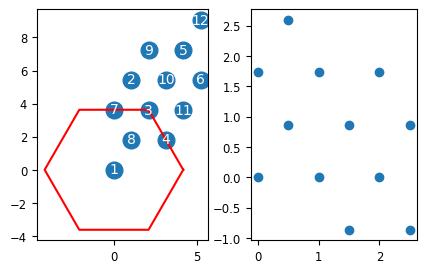

┌ Warning: `vendor()` is deprecated, use `BLAS.get_config()` and inspect the output instead
│   caller = npyinitialize() at numpy.jl:67
└ @ PyCall /gpfs/home/kyungminlee_42/.julia/packages/PyCall/3fwVL/src/numpy.jl:67


In [5]:
fig = PyPlot.figure(figsize=(5,3))
ax = fig.add_subplot(1,2,1)
ax.plot(2π * latticedata.momentums[1,:], 2π * latticedata.momentums[2,:], "o", markersize=12)
for i in 1:size(latticedata.momentums, 2)
    ax.text(2π * latticedata.momentums[1,i], 2π * latticedata.momentums[2,i], "$i", ha="center", va="center", color="w")
end
ax.set_aspect(1.0)
ax.plot(latticedata.zone_boundary[1,:], latticedata.zone_boundary[2,:], "r-")

ax = fig.add_subplot(1,2,2)
ax.plot(latticedata.sitecoordinates[1,:], latticedata.sitecoordinates[2,:], "o")
ax.set_aspect(1.0)

In [6]:
kpoint_indices = Dict("GM" => 1, "K" => 3, "M" => 4, "LD" => 8);

In [7]:
df = read_data(datadir("curie", shape_str, "sectors.sqlite3"), kpoint_indices);

In [8]:
process_data!(df, latticedata)

In [9]:
interactions = unique(sort(df.interaction))
hoppings = unique(sort(df.hopping))
temperatures = unique(sort(df.temperature))
charges = unique(sort(df.charge))
;

In [10]:
check_data(df)

filter((row->begin
            #= /gpfs/research/changlani/Lee_project/TriangularHubbard/notebooks/processdata.jl:135 =#
            !(isapprox(row.uu_GM, row.nup .^ 2 * row.partition))
        end), df) = 0×42 DataFrame


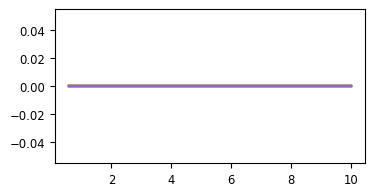

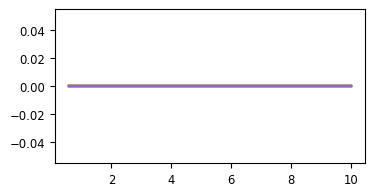

In [11]:
checkplot(df)

In [12]:
canonical_df = filter(
    row -> 0.4 <= row.density <= 1.7,
    compute_canonical(df, kpoint_indices)
);

In [16]:
@. model(x, p) = (x - p[2]) / p[1]

canonical_fit_df = compute_canonical_fit(
    canonical_df,
    model,
    [0.7, 5.5],
    latticedata,
)

32×13 DataFrame
 Row │ hopping  interaction  density   intercept_0  intercept_M  intercept_GM  ⋯
     │ Float64  Float64      Float64   Float64      Float64      Float64       ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │     1.0       1.0e-5  0.416667  -0.884813      0.127571    -0.884813    ⋯
   2 │     1.0      20.0     0.416667  -0.514031      0.101199    -0.514031
   3 │     1.0       1.0e-5  0.5       -0.772776      0.129023    -0.772776
   4 │     1.0      20.0     0.5       -0.379604      0.110164    -0.379604
   5 │     1.0       1.0e-5  0.583333  -0.735074      0.126579    -0.735074    ⋯
   6 │     1.0      20.0     0.583333  -0.303389      0.117806    -0.303389
   7 │     1.0       1.0e-5  0.666667  -0.746353      0.121588    -0.746353
   8 │     1.0      20.0     0.666667  -0.272894      0.125341    -0.272894
   9 │     1.0       1.0e-5  0.75      -0.796663      0.114709    -0.796663    ⋯
  10 │     1.0      20.0     0.75      -0.272346      0.132312    -0.272346
  11 │     1.0       1.0e-5  0.833333  -0.884299      0.106917    -0.884299
  ⋮  │    ⋮          ⋮          ⋮           ⋮            ⋮            ⋮        ⋱
  23 │     1.0       1.0e-5  1.33333   -1.08448       0.0859184   -1.08448
  24 │     1.0      20.0     1.33333   -0.138299      0.0327287   -0.138299    ⋯
  25 │     1.0       1.0e-5  1.41667   -0.858287      0.0867893   -0.858287
  26 │     1.0      20.0     1.41667   -0.124295      0.0309889   -0.124295
  27 │     1.0       1.0e-5  1.5       -0.671409      0.0841358   -0.671409
  28 │     1.0      20.0     1.5       -0.0807949     0.029315    -0.0807949   ⋯
  29 │     1.0       1.0e-5  1.58333   -0.511338      0.0770413   -0.511338
  30 │     1.0      20.0     1.58333   -0.0320206     0.0249312   -0.0320206
  31 │     1.0       1.0e-5  1.66667   -0.368046      0.0650334   -0.368046
  32 │     1.0      20.0     1.66667   -0.00768454    0.0204315   -0.00768454  ⋯
                                                   7 columns and 11 rows omitted

In [17]:
CSV.write("canonical_triangular-$(shape_str).csv", filter(row->row.hopping==1.0 && row.interaction==20.0, canonical_df))
CSV.write("canonical-fit_triangular-$(shape_str).csv", filter(row->row.hopping==1.0 && row.interaction==20.0, canonical_fit_df))

"canonical-fit_triangular-(2,-2)x(2,4).csv"

In [ ]:
densities = unique(sort(canonical_fit_df.density));

In [ ]:
# plot_specific_heat(
#     filter(row->row.hopping == 1.0 && row.interaction == 20.0, canonical_df), 4, 4; prefix="canonical_")

In [ ]:
RL()

In [ ]:
# ncols_rho = Int(ceil(sqrt(length(select_densities))))
# nrows_rho = Int(ceil(length(select_densities) / ncols_rho))
# println(length(select_densities), ", ", nrows_rho, ", ", ncols_rho)

select_temperatures = [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1.0, 2.0, 5.0]
select_temperature_lookup = Dict(v => i for (i, v) in enumerate(select_temperatures))
nrows_T, ncols_T = 3, 3
;

In [19]:
# panels = (
#     nrows=nrows_rho,
#     ncols=ncols_rho,
#     select_density_lookup=select_density_lookup
# )

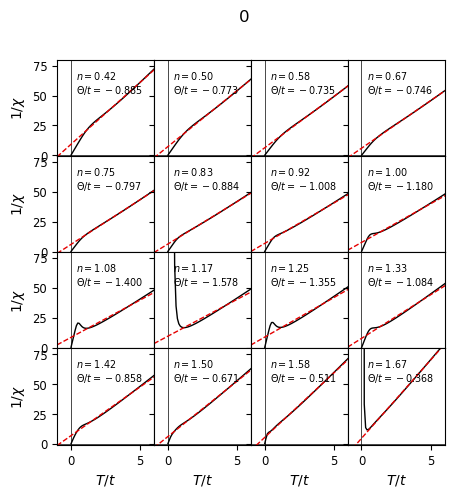

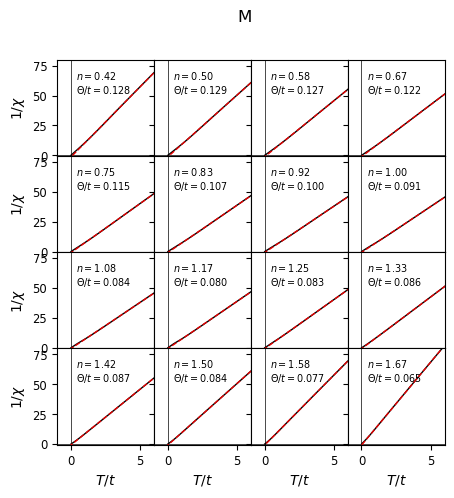

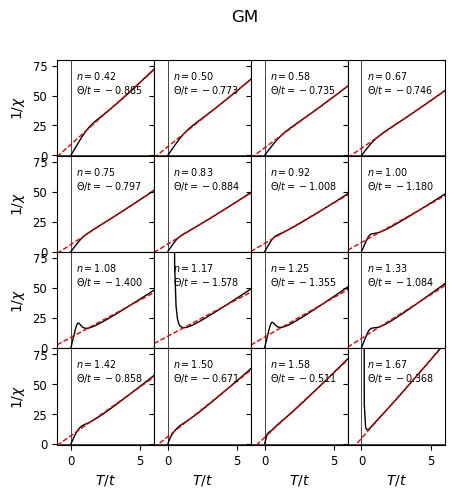

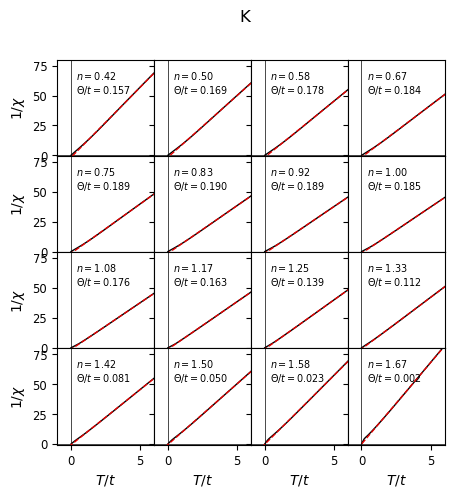

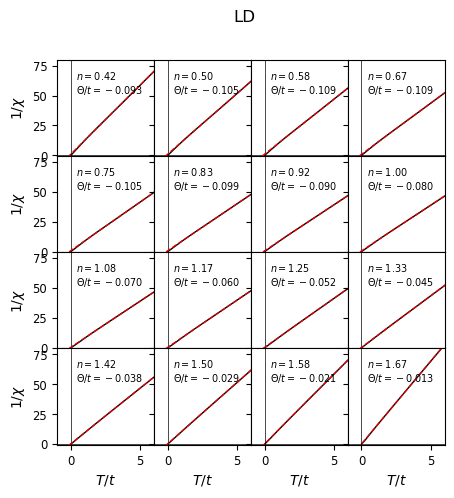

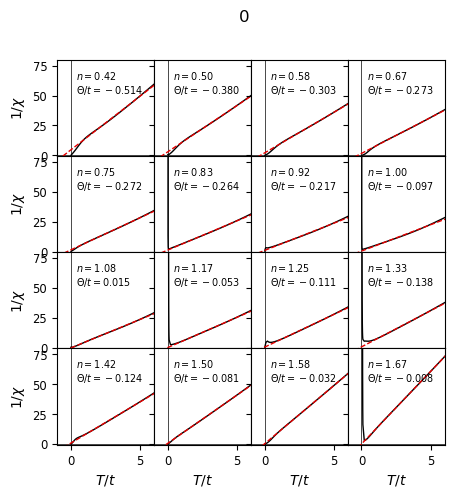

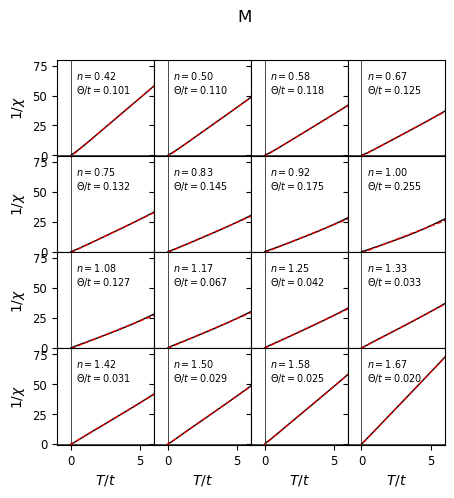

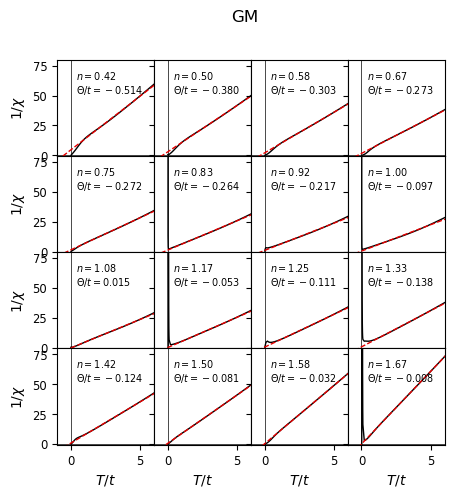

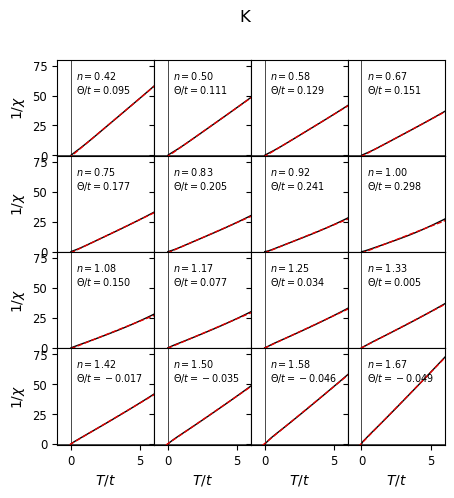

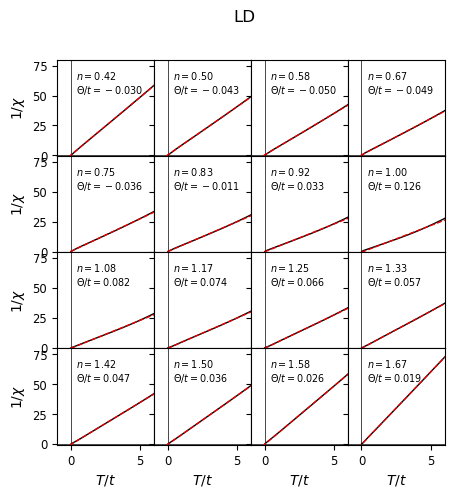

In [20]:
plot_susceptibility(canonical_df, canonical_fit_df, (4,4); prefix="canonical_")

In [ ]:
plot_susceptibility_normalized(canonical_df,
    ["K", "M", "LD"],
    Dict("K"=>(color="xkcd:dark red", linestyle=":", label=raw"$K$"),
         "M"=>(color="xkcd:dark blue", linestyle="--", label=raw"$M$"),
         "LD"=>(color="xkcd:dark green", linestyle="-", label=raw"$\Lambda$"),
        
        ),
    (4, 4); prefix="canonical_")

In [ ]:
RL()

In [ ]:
plot_curie_weiss_fit(canonical_fit_df, "0", (-0.5, 0.1), (0, 3); prefix="canonical_")
plot_curie_weiss_fit(canonical_fit_df, "GM", (-0.5, 0.1), (0, 3); prefix="canonical_")
plot_curie_weiss_fit(canonical_fit_df, "K", (-0.1, 0.35), (0, 3); prefix="canonical_")
plot_curie_weiss_fit(canonical_fit_df, "M", (0.0, 0.3), (0, 3); prefix="canonical_")
plot_curie_weiss_fit(canonical_fit_df, "LD", (-0.1, 0.2), (0, 3); prefix="canonical_")

In [ ]:
# plot_curie_weiss_fit(canonical_fit_df, "0", (-1., 0.3), (0, 0.2); prefix="canonical_")
# plot_curie_weiss_fit(canonical_fit_df, "GM", (-1., 0.3), (0, 0.2); prefix="canonical_")
# plot_curie_weiss_fit(canonical_fit_df, "SM", (-0.05, 0.15), (0, 0.25); prefix="canonical_")
# plot_curie_weiss_fit(canonical_fit_df, "K", (-0.2, 0.3), (0, 0.25); prefix="canonical_")

In [ ]:
# structure_factor_df = compute_structure_factor(
#     sort(
#         filter(
#             row -> 
#             (0.2 <= row.density <= 1.8)
#             && (row.temperature in select_temperatures),
#             df), [:density, :temperature])
#     )
# ;

In [ ]:
RL()

In [ ]:
select_temperatures = [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1.0, 2.0, 5.0];

In [ ]:
# plot_structure_factor_map(structure_factor_df, latticedata, nrows_T, ncols_T;
# marker="H", markersize=500)

plot_structure_factor_map(
    sort(
        filter(
            row -> (0.2 <= row.density <= 1.8) && (row.temperature in select_temperatures),
            canonical_df
        ),
        [:temperature, :density]
    ),
    latticedata, 4, 4;
    marker="H", markersize=300,
    prefix="canonical_",
)

# Grand Canonical Ensemble

In [21]:
include("processdata.jl")

compute_grand_canonical (generic function with 2 methods)

In [22]:
grand_canonical_df = compute_grand_canonical(df, latticedata, kpoint_indices);

In [23]:
# for sdf in groupby(df, :temperature)
#     T = first(sdf.temperature)    
#     n_sites = 9
#     function f(μ)
#         E0 = minimum(sdf.base_energy .- μ .* sdf.charge)
#         boltzmann = exp.(-(sdf.base_energy .- μ .* sdf.charge .- E0 ) ./ T)
#         Z = sum(boltzmann .* sdf.partition)
#         return sum(sdf.charge .* boltzmann .* sdf.partition) / Z / n_sites
#     end
#     μs = -3:0.1:3
#     ρs = f.(μs)
#     PyPlot.plot(μs, ρs)
# end

In [24]:
names(grand_canonical_df)

13-element Vector{String}:
 "density"
 "converged_density"
 "chemical_potential"
 "hopping"
 "interaction"
 "temperature"
 "specific_heat"
 "susceptibilities_0"
 "susceptibilities_M"
 "susceptibilities_GM"
 "susceptibilities_K"
 "susceptibilities_LD"
 "Sq"

In [25]:
grand_canonical_fit_df = compute_canonical_fit(grand_canonical_df, model, [0.7, 5.5], latticedata)

32×13 DataFrame
 Row │ hopping  interaction  density  intercept_0  intercept_M  intercept_GM   ⋯
     │ Float64  Float64      Float64  Float64      Float64      Float64        ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │     1.0       1.0e-5      0.2  -2.30123       0.110903    -2.30123      ⋯
   2 │     1.0      20.0         0.2  -1.59509       0.0654769   -1.59509
   3 │     1.0       1.0e-5      0.3  -1.23153       0.13278     -1.23153
   4 │     1.0      20.0         0.3  -0.80779       0.087492    -0.80779
   5 │     1.0       1.0e-5      0.4  -0.925835      0.140803    -0.925835     ⋯
   6 │     1.0      20.0         0.4  -0.525095      0.102423    -0.525095
   7 │     1.0       1.0e-5      0.5  -0.804459      0.141846    -0.804459
   8 │     1.0      20.0         0.5  -0.381315      0.114192    -0.381315
   9 │     1.0       1.0e-5      0.6  -0.768708      0.139029    -0.768708     ⋯
  10 │     1.0      20.0         0.6  -0.30485       0.125371    -0.30485
  11 │     1.0       1.0e-5      0.7  -0.787578      0.13398     -0.787578
  ⋮  │    ⋮          ⋮          ⋮          ⋮            ⋮            ⋮         ⋱
  23 │     1.0       1.0e-5      1.3  -1.06161       0.104628    -1.06161
  24 │     1.0      20.0         1.3  -0.0962111     0.0540476   -0.0962111    ⋯
  25 │     1.0       1.0e-5      1.4  -0.859615      0.102204    -0.859615
  26 │     1.0      20.0         1.4  -0.103927      0.0396385   -0.103927
  27 │     1.0       1.0e-5      1.5  -0.670389      0.0969089   -0.670389
  28 │     1.0      20.0         1.5  -0.0771834     0.0327617   -0.0771834    ⋯
  29 │     1.0       1.0e-5      1.6  -0.503515      0.0875079   -0.503515
  30 │     1.0      20.0         1.6  -0.0412632     0.0271195   -0.0412632
  31 │     1.0       1.0e-5      1.7  -0.356102      0.0733131   -0.356102
  32 │     1.0      20.0         1.7  -0.0149857     0.0212086   -0.0149857    ⋯
                                                   7 columns and 11 rows omitted

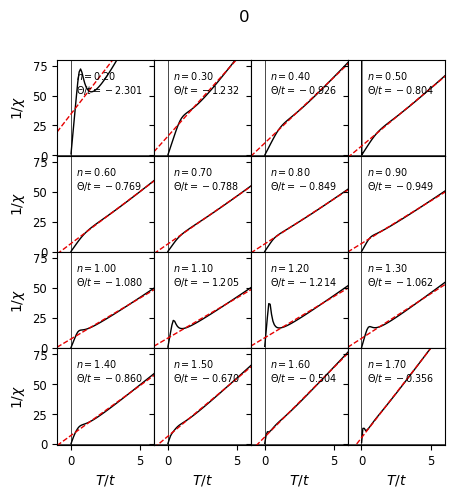

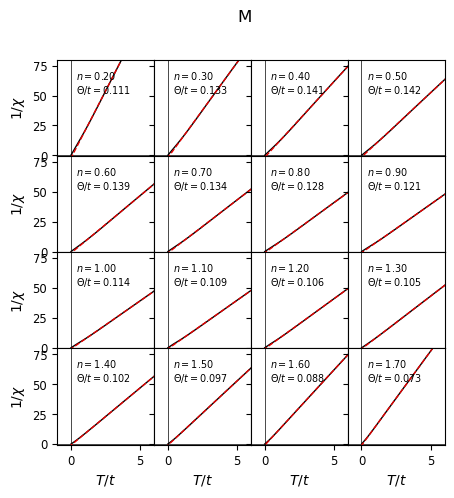

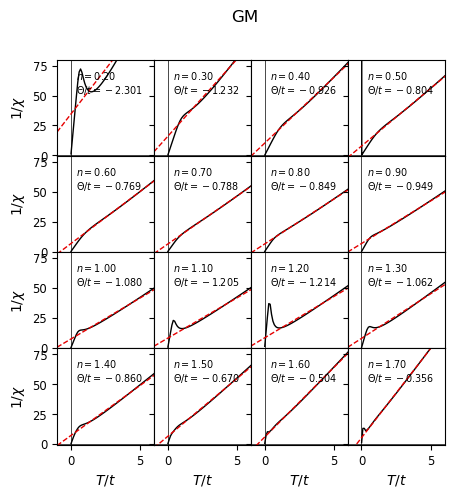

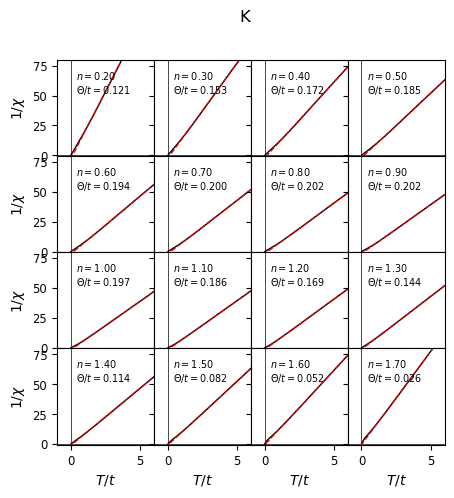

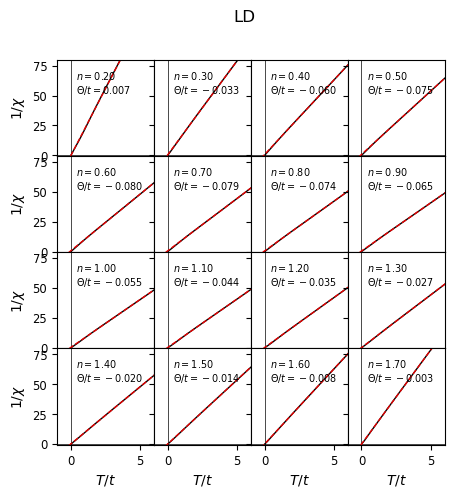

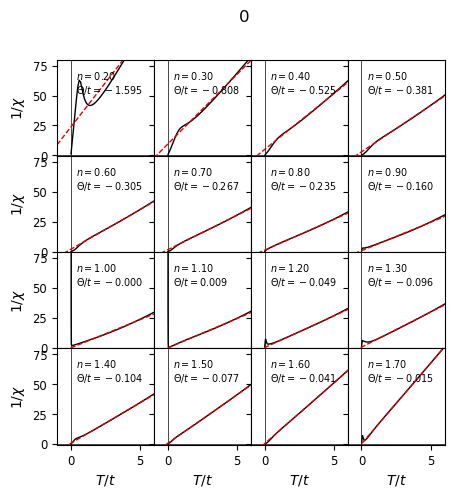

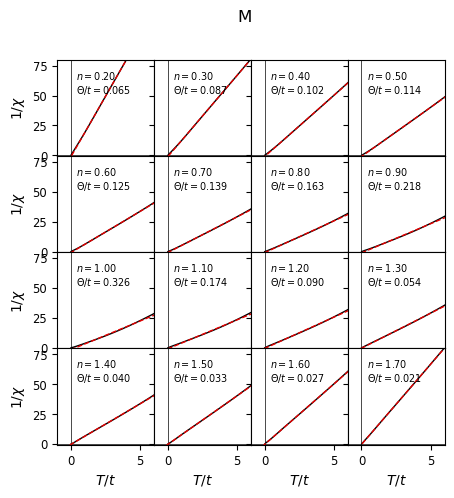

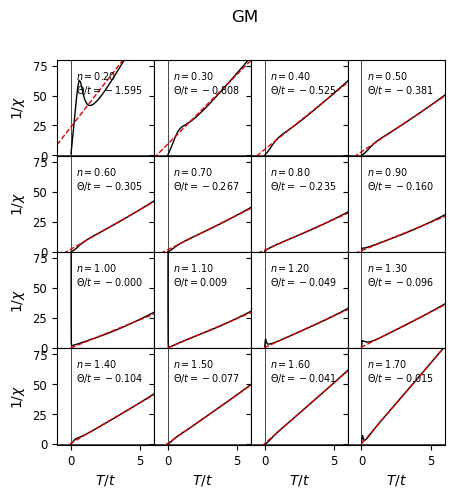

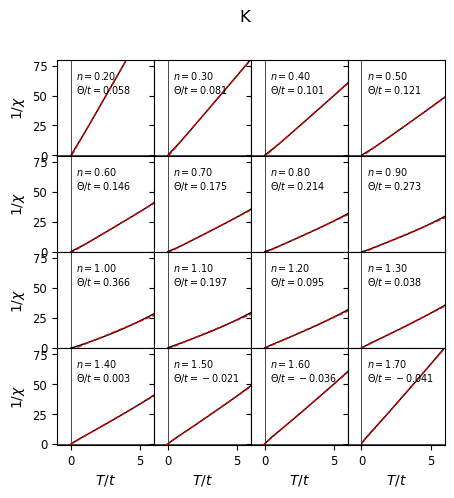

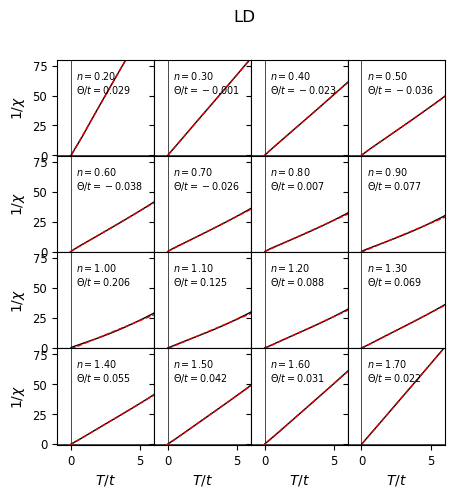

In [26]:
plot_susceptibility(grand_canonical_df, grand_canonical_fit_df, (4,4); prefix="grandcanonical_")

In [ ]:
include("processdata.jl")

In [ ]:
# plot_curie_weiss_fit(grand_canonical_fit_df, "0", (-1., 0.3), (0, 0.2); prefix="grandcanonical_")
# plot_curie_weiss_fit(grand_canonical_fit_df, "GM", (-1., 0.3), (0, 0.2); prefix="grandcanonical_")
# plot_curie_weiss_fit(grand_canonical_fit_df, "SM", (-0.05, 0.25), (0, 0.25); prefix="grandcanonical_")
# plot_curie_weiss_fit(grand_canonical_fit_df, "K", (-0.2, 0.35), (0, 0.25); prefix="grandcanonical_")

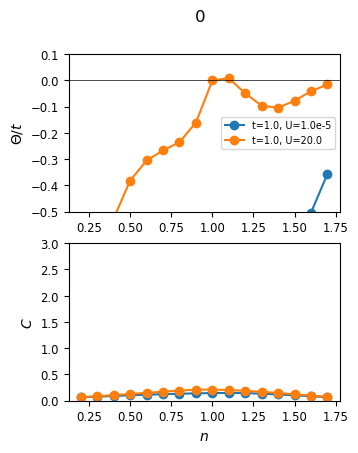

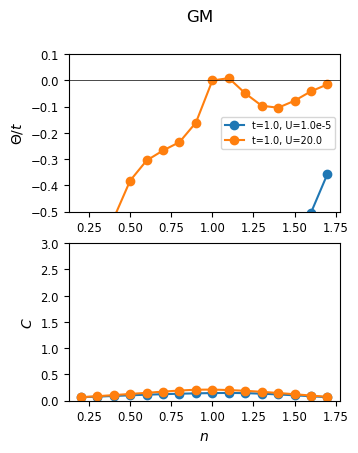

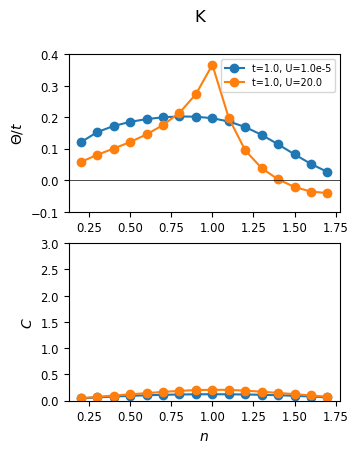

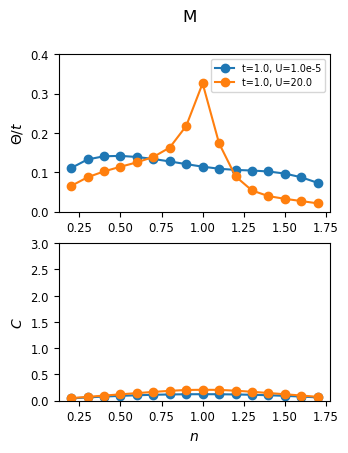

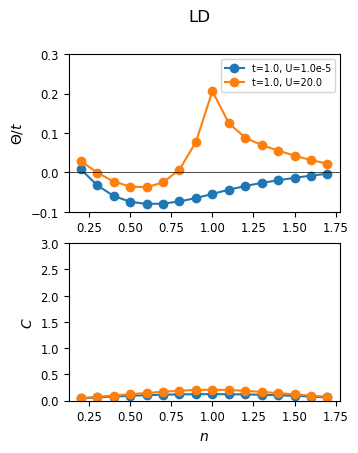

In [27]:
plot_curie_weiss_fit(grand_canonical_fit_df, "0", (-0.5, 0.1), (0, 3); prefix="grandcanonical_")
plot_curie_weiss_fit(grand_canonical_fit_df, "GM", (-0.5, 0.1), (0, 3); prefix="grandcanonical_")
plot_curie_weiss_fit(grand_canonical_fit_df, "K", (-0.1, 0.4), (0, 3); prefix="grandcanonical_")
plot_curie_weiss_fit(grand_canonical_fit_df, "M", (0.0, 0.4), (0, 3); prefix="grandcanonical_")
plot_curie_weiss_fit(grand_canonical_fit_df, "LD", (-0.1, 0.3), (0, 3); prefix="grandcanonical_")

In [ ]:
plot_structure_factor_map(
    sort(
        filter(
            row -> (0.2 <= row.density <= 1.8) && (row.temperature in select_temperatures),
            grand_canonical_df
        ),
        [:hopping, :interaction, :temperature, :density]
    ),
    latticedata, 4, 4;
    marker="H", markersize=300,
    prefix="grandcanonical_",
)

In [ ]:
grand_canonical_df